In [1]:
from loguru import logger
import ndf.download
from ndf.datamining import datamining
import warnings
import sys
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)

log_level = 'DEBUG'
logger.add(sys.stderr, format="{time} {level} {message}", filter="my_module", level=log_level)
# logger.add(sys.stdout, colorize=True, format="<green>{time}</green> <level>{message}</level>")
logger.add("ndfdownload.log", rotation="30 MB", level=log_level)

2

In [2]:
import requests
import time

MAX_RETRIES = 4
TIME_TO_WAIT = 10

def download_manager(url):
    r = None
    # logger.info(f'Download settings: MAX_RETRIES:{MAX_RETRIES} | TIME_TO_WAIT:{TIME_TO_WAIT}')
    for _ in range(MAX_RETRIES):
        try:
            r = requests.get(url, verify=False)
        except requests.exceptions.RequestException as e:
            print(f'Download fail, {e}')
        if r:
            print(f'Download Ok')
            break
        else:
            wait = TIME_TO_WAIT * (_ + 1) if _ < 3 else TIME_TO_WAIT * (_ * 3)
            print(f'Download fail, retry in {wait} seconds...')
            time.sleep(wait)
    return r

In [3]:
# download_manager('https://www.tullettprebon.com/swap-execution-facility/daily-activity-summary.aspx')

In [4]:
from datetime import datetime

a = datetime.now()
a.date()

datetime.date(2023, 6, 27)

In [5]:
d = ndf.download.download()
d.download_all()

2023-06-27 10:15:26.415 | INFO     | ndf.download:_download:55 - BGC - Download start >>>
2023-06-27 10:15:26.417 | DEBUG    | ndf.download:_download:58 - Try download bgc from http://dailyactprod.bgcsef.com/SEF/DailyAct/DailyAct_20230626.xls
2023-06-27 10:15:26.420 | INFO     | ndf.download:_download:80 - Loaded bgc DATA from cache /Users/cleiton/projects/ndfutil/DATA/bgc_2023-06-27.pkl
2023-06-27 10:15:26.421 | INFO     | ndf.download:_download:55 - TRADITION - Download start >>>
2023-06-27 10:15:26.423 | DEBUG    | ndf.download:_download:58 - Try download tradition from https://www.traditionsef.com/dailyactivity/SEF16_MKTDATA_TFSU_20230626.csv
2023-06-27 10:15:26.428 | INFO     | ndf.download:_download:80 - Loaded tradition DATA from cache /Users/cleiton/projects/ndfutil/DATA/tradition_2023-06-27.pkl
2023-06-27 10:15:26.429 | INFO     | ndf.download:_download:55 - TULLETPREBON - Download start >>>
2023-06-27 10:15:26.429 | DEBUG    | ndf.download:_download:58 - Try download tulletpr

bgc ok
tradition ok
prebontullet ok
gfi ok


In [6]:
mining = datamining()

In [7]:
mining.tulletprebon_calcs()

2023-06-27 10:15:26.450 | INFO     | ndf.datamining:tulletprebon_calcs:177 - tulletprebon calcs starting
2023-06-27 10:15:26.451 | DEBUG    | ndf.datamining:tulletprebon_calcs:179 - Opening CACHE FILE /Users/cleiton/projects/ndfutil/DATA/tulletprebon_2023-06-27.pkl
2023-06-27 10:15:26.462 | DEBUG    | ndf.datamining:tulletprebon_calcs:198 - tullet before mining:
    Batch Date Asset Class         Tradeable Instrument  \
0   2023-06-26          CU       0D_NDF.USD.BRL.TOD_NDF   
1   2023-06-26          CU       0D_NDF.USD.BRL.TOM_NDF   
2   2023-06-26          CU  1287D_NDF.USD.BRL.1287D_NDF   
3   2023-06-26          CU        1D_NDF.USD.BRL.1D_NDF   
4   2023-06-26          CU        2D_NDF.USD.BRL.2D_NDF   
5   2023-06-26          CU               2D_NDF_USD_BRL   
6   2023-06-26          CU     35D_NDF.USD.BRL.BMF2_NDF   
7   2023-06-26          CU               3D_NDF_USD_BRL   
8   2023-06-26          CU               4D_NDF_USD_BRL   
9   2023-06-26          CU        5D_NDF.USD.

,Total for human,Volume
Class,,
BMF1,2.14B,2.141637e+09
BMF2,1.01B,1.012937e+09
BMF3,150M,1.500000e+08
BROKEN,575M,5.750000e+08
GT 1 YEAR,3M,3.000000e+06
LONGER,450M,4.500000e+08
PTAX,3M,3.000000e+06
TOMPTAX,360M,3.600000e+08
TOTAL,4.97B,4.965573e+09


In [8]:
mining.bgc_calcs()

2023-06-27 10:15:26.503 | INFO     | ndf.datamining:bgc_calcs:481 - bgc calcs starting
2023-06-27 10:15:26.504 | DEBUG    | ndf.datamining:bgc_calcs:483 - Opening CACHE FILE /Users/cleiton/projects/ndfutil/DATA/bgc_2023-06-27.pkl
2023-06-27 10:15:26.516 | DEBUG    | ndf.datamining:bgc_calcs:518 - BGC before mining:
0  Trade Date                     Description OpenType LowType HighType  \
0  2023-06-26  USDBRL NDF 26JUN2023 BILATERAL    TRANS   TRANS    TRANS   
1  2023-06-26  USDBRL NDF 27JUN2023 BILATERAL    TRANS   TRANS    TRANS   
2  2023-06-26  USDBRL NDF 28JUN2023 BILATERAL    TRANS   TRANS    TRANS   
3  2023-06-26  USDBRL NDF 30JUN2023 BILATERAL    TRANS   TRANS    TRANS   
4  2023-06-26  USDBRL NDF 31JUL2023 BILATERAL    TRANS   TRANS    TRANS   

0 CloseType EDRPVolume     Volume  
0     TRANS        NaN  223000000  
1     TRANS        NaN   57000000  
2     TRANS        NaN   37000000  
3     TRANS        NaN  449224000  
4     TRANS        NaN  194000000  
2023-06-27 10:15

,Total for human,Volume
Class,,
BMF,449.22M,449224000
BMF2,194M,194000000
BROKEN,317M,317000000
TOTAL,960.22M,960224000


In [9]:
mining.tradition_calcs()

2023-06-27 10:15:26.538 | INFO     | ndf.datamining:tradition_calcs:40 - tradition calcs starting
2023-06-27 10:15:26.540 | DEBUG    | ndf.datamining:tradition_calcs:42 - Opening CACHE FILE /Users/cleiton/projects/ndfutil/DATA/tradition_2023-06-27.pkl
2023-06-27 10:15:26.558 | DEBUG    | ndf.datamining:tradition_calcs:167 - TRADITION Summary ===>
      Total for human  Volume
Class                        
TOTAL               0       0



,Total for human,Volume
Class,,
TOTAL,0,0


In [10]:
mining.gfi_calcs()

2023-06-27 10:15:26.567 | INFO     | ndf.datamining:gfi_calcs:367 - gfi calcs starting
2023-06-27 10:15:26.568 | DEBUG    | ndf.datamining:gfi_calcs:369 - Opening CACHE FILE /Users/cleiton/projects/ndfutil/DATA/gfi_2023-06-27.pkl
2023-06-27 10:15:26.577 | DEBUG    | ndf.datamining:gfi_calcs:402 - GFI before mining:
0                     Description      Volume
0  USDBRL NDF 26JUN2023 BILATERAL   267000000
1  USDBRL NDF 27JUN2023 BILATERAL   260000000
2  USDBRL NDF 30JUN2023 BILATERAL  3435000000
3  USDBRL NDF 31JUL2023 BILATERAL  2113000000
4  USDBRL NDF 31AUG2023 BILATERAL   100000000
2023-06-27 10:15:26.594 | DEBUG    | ndf.datamining:gfi_calcs:471 - GFI _summary ===>
       Total for human      Volume
Class                             
BMF              3.44B  3435000000
BMF2             2.11B  2113000000
BMF3              100M   100000000
BROKEN            527M   527000000
TOTAL            6.18B  6175000000



,Total for human,Volume
Class,,
BMF,3.44B,3435000000
BMF2,2.11B,2113000000
BMF3,100M,100000000
BROKEN,527M,527000000
TOTAL,6.18B,6175000000


2023-06-27 10:16:59.107 | INFO     | ndf.datamining:tulletprebon_calcs:177 - tulletprebon calcs starting
2023-06-27 10:16:59.110 | DEBUG    | ndf.datamining:tulletprebon_calcs:179 - Opening CACHE FILE /Users/cleiton/projects/ndfutil/DATA/tulletprebon_2023-06-27.pkl
2023-06-27 10:16:59.121 | DEBUG    | ndf.datamining:tulletprebon_calcs:198 - tullet before mining:
    Batch Date Asset Class         Tradeable Instrument  \
0   2023-06-26          CU       0D_NDF.USD.BRL.TOD_NDF   
1   2023-06-26          CU       0D_NDF.USD.BRL.TOM_NDF   
2   2023-06-26          CU  1287D_NDF.USD.BRL.1287D_NDF   
3   2023-06-26          CU        1D_NDF.USD.BRL.1D_NDF   
4   2023-06-26          CU        2D_NDF.USD.BRL.2D_NDF   
5   2023-06-26          CU               2D_NDF_USD_BRL   
6   2023-06-26          CU     35D_NDF.USD.BRL.BMF2_NDF   
7   2023-06-26          CU               3D_NDF_USD_BRL   
8   2023-06-26          CU               4D_NDF_USD_BRL   
9   2023-06-26          CU        5D_NDF.USD.

True

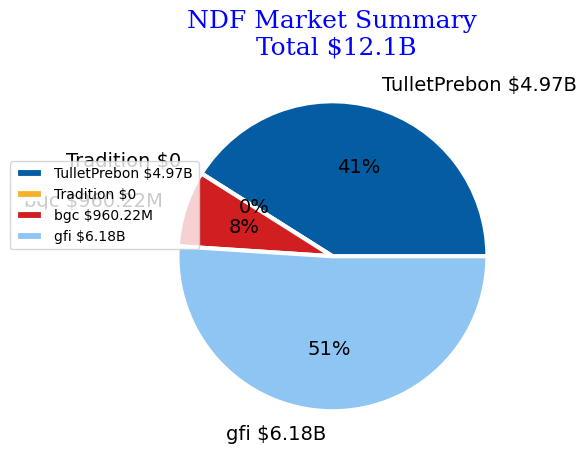

In [12]:
mining.generate_chart()

In [11]:
tulletprebon['source'] = 'TulletPrebon'
tradition['source'] = 'Tradition'
bgc['source'] = 'bgc'
gfi['source'] = 'gfi'

NameError: name 'tulletprebon' is not defined

In [ ]:
bgc

In [ ]:
df_result = pd.concat([tulletprebon, tradition, bgc, gfi])
df_result

In [ ]:
df_totals = df_result.query('Class == "TOTAL"')
df_totals

In [ ]:
df_totals.groupby(['Class']).sum()

In [ ]:
from numerize import numerize

market_total = df_totals.sum()['Volume']
market_total = numerize.numerize(float(market_total))
market_total